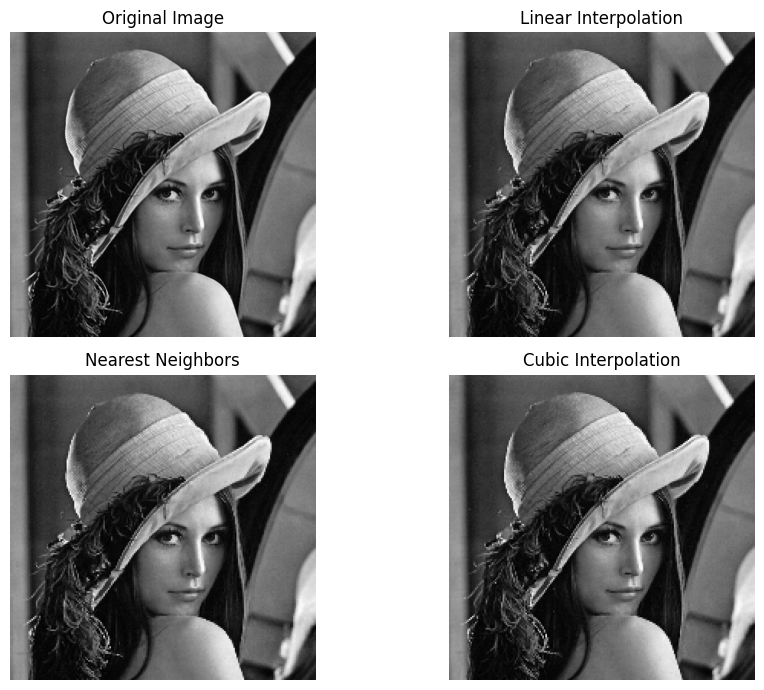

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/Picture 1 CV.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resizing using different interpolation methods
resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
resized_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# Display the results
titles = ["Original Image", "Linear Interpolation", "Nearest Neighbors", "Cubic Interpolation"]
images = [image, resized_linear, resized_nearest, resized_cubic]

plt.figure(figsize=(10, 7))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


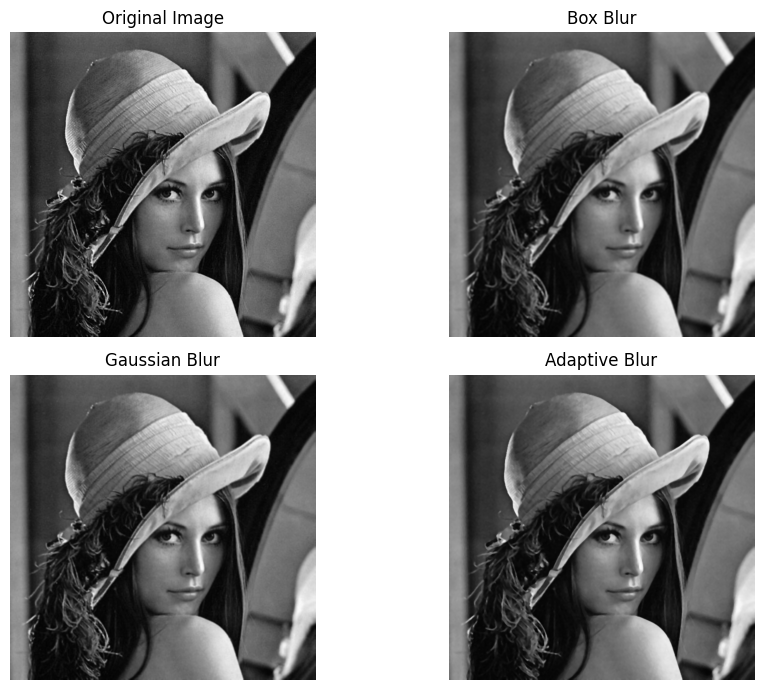

In [9]:
# Box Blurring
box_blur = cv2.blur(image, (5, 5))

# Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Adaptive Blurring (Median Blur as adaptive example)
adaptive_blur = cv2.medianBlur(image, 5)

# Display the results
titles = ["Original Image", "Box Blur", "Gaussian Blur", "Adaptive Blur"]
images = [image, box_blur, gaussian_blur, adaptive_blur]

plt.figure(figsize=(10, 7))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load MNIST dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from sklearn.naive_bayes import GaussianNB

# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_nb = nb_model.predict(X_test)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Display confusion matrix
print("Confusion Matrix (Naive Bayes):\n", conf_matrix_nb)
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


Confusion Matrix (Naive Bayes):
 [[31  0  0  0  0  1  0  1  0  0]
 [ 0 21  0  0  0  0  0  2  4  1]
 [ 0  5 12  0  0  3  1  0 12  0]
 [ 0  0  1 26  0  0  1  0  6  0]
 [ 1  0  0  0 24  0  2 19  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  1  0  0  0  1  0  3 25  0]
 [ 0  1  1  1  0  4  0  4  4 25]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.75      0.75      0.75        28
           2       0.86      0.36      0.51        33
           3       0.93      0.76      0.84        34
           4       1.00      0.52      0.69        46
           5       0.81      0.94      0.87        47
           6       0.88      1.00      0.93        35
           7       0.52      0.97      0.68        34
           8       0.49      0.83      0.62        30
           9       0.96      0.62      0.76        40

 

In [12]:
from sklearn.svm import SVC

# Train the model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix
print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Confusion Matrix (SVM):
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  1  0  0  0  1  0 38]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy     

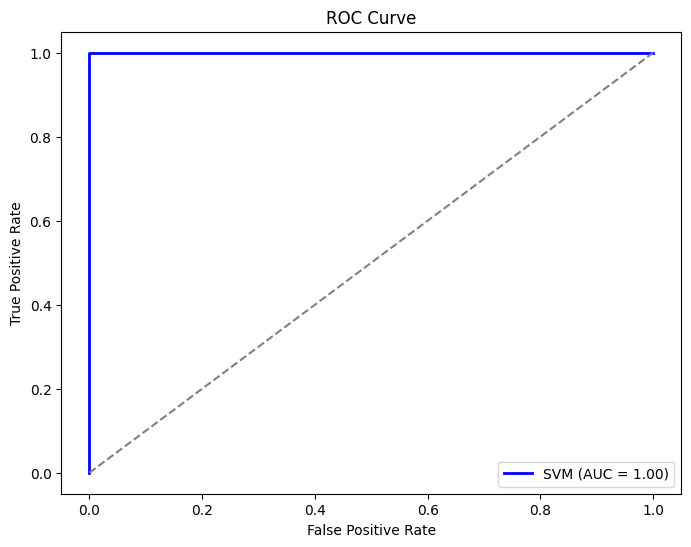

In [13]:
# Calculate ROC and AUC for SVM
y_prob_svm = svm_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob_svm[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
